### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [7]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [5]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [6]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [8]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [10]:
# data structure Chicago
str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


# Data Wrangling
A bit of manipulation of data to make task easier

In [12]:
# Creating null columns of 'Gender' and 'Birth.Year' in the Washington dataset to be able to concatenate all
wash$Gender <- NA
wash$Birth.Year <-NA

In [13]:
# Adding a new column 'City' to each dataset to retain info about city after concatenation
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'

In [14]:
#Creating a function for concatenation
concatenation <- function(d1, d2) {
  return(rbind(d1, d2))
}

In [15]:
# Concatenating all three datasets together as "city"
city <- concatenation(ny,wash)     #city <- rbind(ny, wash)
city <- concatenation(city,chi)    #city <- rbind(city, chi)
head(city)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


In [20]:
# Importing library
library(ggplot2)
library(lubridate) # To extract month from date


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Question 1


**What are the counts of each gender (only available for NYC and Chicago)?**

In [16]:
# Creating new city2 by binding 'New York City' and 'Chicago' data
# Here omitting Washington data is done due to lack of information about 'Gender' and 'Birth.Year'

city2 <- concatenation(chi,ny)      #city2 <- rbind(chi, ny)

In [17]:
# Count of Gender (Male and Female)
total = sort(table(city2$Gender))
print(total)

# percentage of Gender (Male and Female)
round((total / length(city2$Gender) * 100), digits = 2)


       Female   Male 
  7158  13882  42360 



       Female   Male 
 11.29  21.90  66.81 

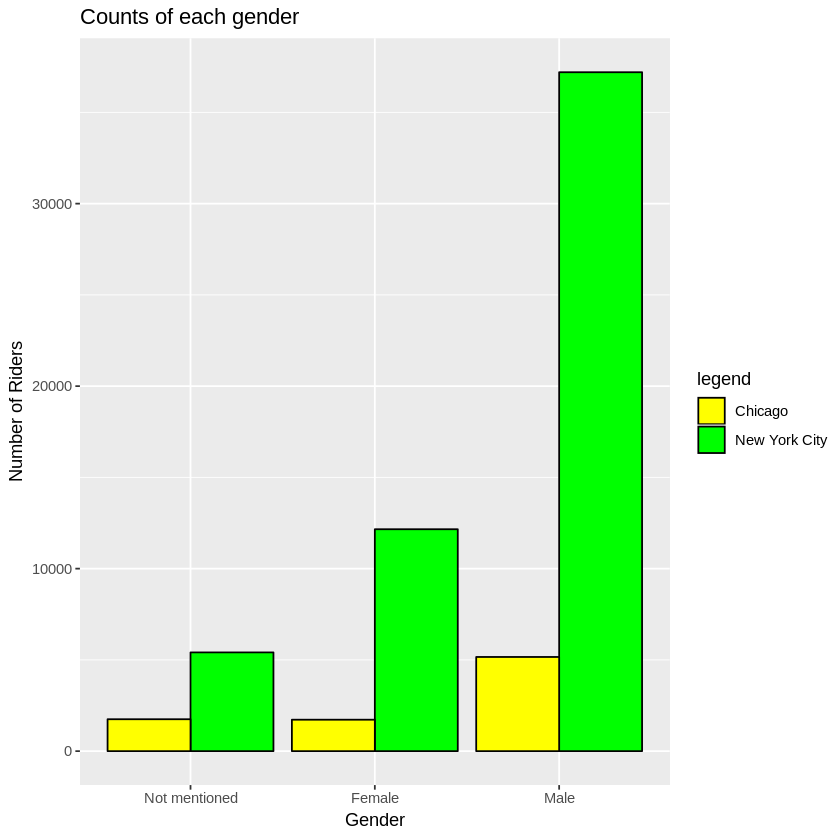

In [22]:
# Visualizing data with ggplot
ggplot(aes(x = Gender, fill = City), data = city2) +
    geom_bar(position = 'dodge', colour="black") +
    ggtitle('Counts of each gender') +
    scale_x_discrete(labels = c('Not mentioned', 'Female', 'Male')) +
    labs(y = 'Number of Riders', x = 'Gender') +
    scale_fill_manual("legend", values = c("Chicago" = "yellow", "New York City" = "green"))

**Here omitting Washington data is done due to lack of information about 'Gender' and 'Birth.Year'.**

- In Chicago and New York City, number of users:

    - Male : 42360 (66.81%)
    - Female : 13882 (21.90%)
    - Not Mentioned: 7158 (11.29%)

- In New York City, among all users there are 67.92% of Male , 22.20% of Female and 9.88% of Not Mentioned'.
- In Chicago, among all users there are 59.78% of Male , 19.97% of Female and 20.25% of Not Mentioned.
- By a large magnitude Males (42360) tends to rent more bikes than Females (13882) do, across both Chicago and New York City.
- Number of data points were null and for some reason riders did not disclose their gender.

### Question 2

**What is the average travel time for users in different cities?**

**DURATION OF TRIP**

In [23]:
# Your solution code goes here# Count of users in City
total_city = sort(table(city$City))
print(total_city)

# percentage of users in City
round((total_city / sum(total_city) * 100), digits = 2)


      Chicago New York City    Washington 
         8630         54770         89051 



      Chicago New York City    Washington 
         5.66         35.93         58.41 

Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

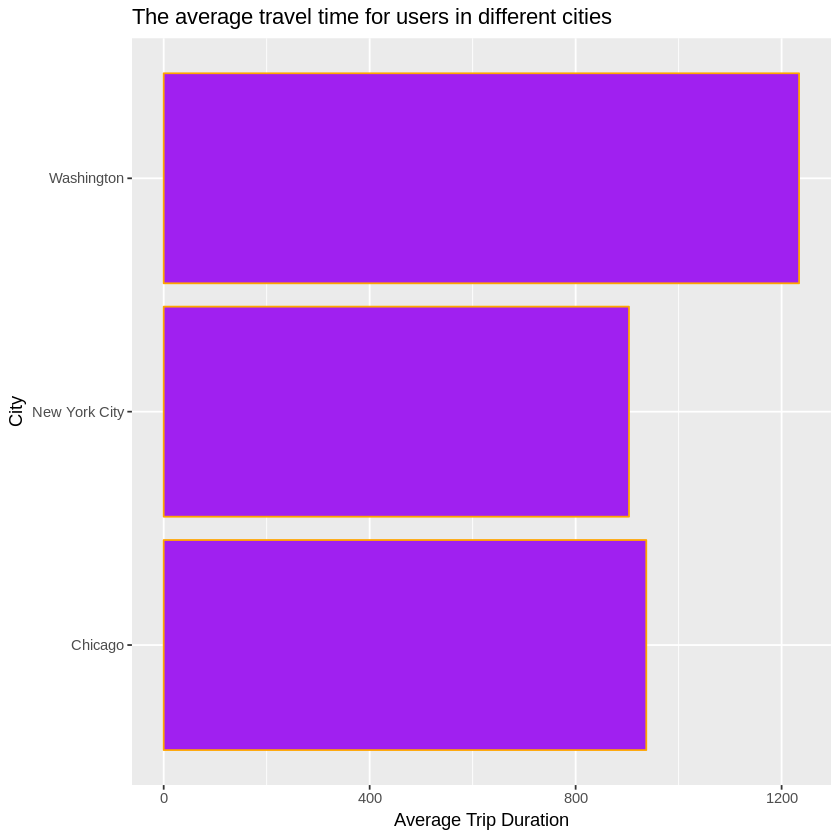

In [31]:
# Visualizing data with ggplot
ggplot(aes(x = City, y = Trip.Duration), data = city) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "mean", fill = "purple", colour="orange") + 
    ggtitle('The average travel time for users in different cities') +
    labs(y = 'Average Trip Duration', x = 'City') +
    coord_flip()

In [32]:
my.summary <- with(city, aggregate(list(Trip.Duration), by = list(City), 
                   FUN = function(x) { mon.mean = mean(x, na.rm = TRUE) } ))

colnames(my.summary) <- c('City', 'Average.Trip.Duration')
my.summary

City,Average.Trip.Duration
Chicago,937.1728
New York City,903.6147
Washington,1233.9533


- Percentage count of users in 
    - Chicago is 5.66%
    - New York City is 35.93% 
    - Washington is 58.41%

- Washington(1233.9533) is leading among all of them in average trip duration due to more number of users.

- The average ride duration in Chicago(937.1728) and New York City(903.6147) cities is more or less the same.

- Although the number of users in Chicago is comparatively less among all, but average trip duration is almost same with New York City

### Question 3

**What is the most common month?**

In [37]:
# Re-formatting of date columns
city$Start.Time <- ymd_hms(city$Start.Time)
city$End.Time <- ymd_hms(city$End.Time)

In [38]:
# Creating new column 'Month' extracting from Start.Time
city$Month <- month(city$Start.Time)

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

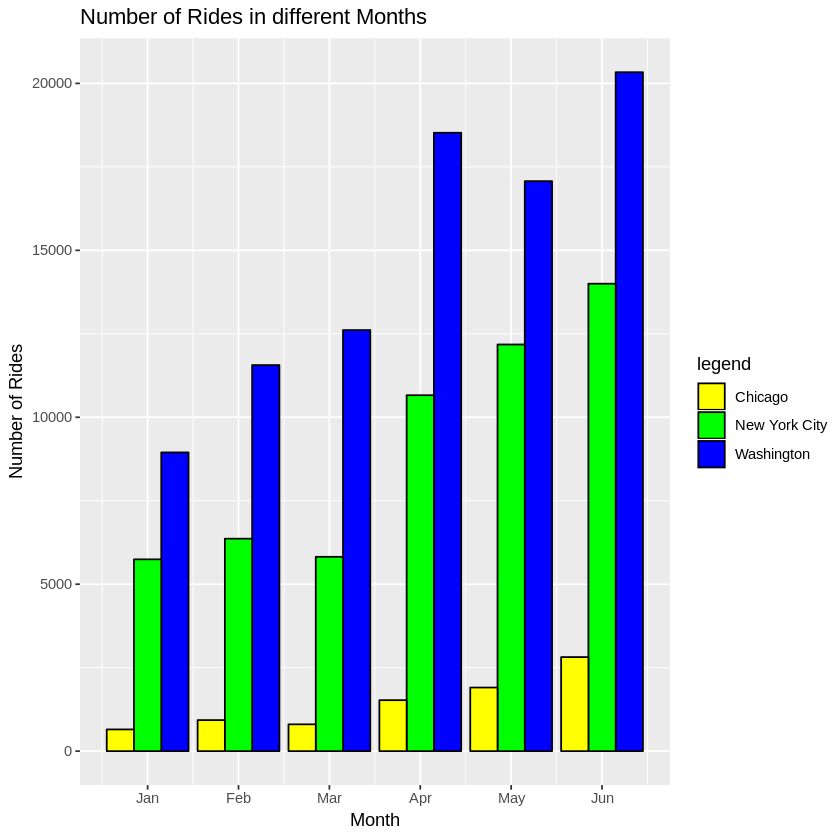

In [39]:
# Visualizing data with ggplot
ggplot(aes(x = Month, fill = City), data = city) +
    geom_bar(position = 'dodge', colour="black") +
    scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')) +
    ggtitle('Number of Rides in different Months') +
    labs(y = 'Number of Rides', x = 'Month') +
    scale_fill_manual("legend", values = c("Chicago" = "yellow", "New York City" = "green", "Washington" = "blue"))

In [41]:
# Count and percentage of users per month
crosstab(city, row.vars = "Month")

     
Month     Count   Total %
  1    15341.00     10.06
  2    18857.00     12.37
  3    19235.00     12.62
  4    30709.00     20.14
  5    31157.00     20.44
  6    37151.00     24.37
  Sum 152450.00    100.00

In [42]:
# Count of users per month by grouped by cities
crosstab(city, row.vars = "Month", col.vars = "City")

# Percentage of users per month by grouped by cities
crosstab(city, row.vars = "Month", col.vars = "City", type = "r")

      City Chicago New York City Washington    Sum
Month                                             
1              650          5745       8946  15341
2              930          6364      11563  18857
3              803          5820      12612  19235
4             1526         10661      18522  30709
5             1905         12180      17072  31157
6             2816         14000      20335  37151
Sum           8630         54770      89050 152450

      City Chicago New York City Washington    Sum
Month                                             
1             4.24         37.45      58.31 100.00
2             4.93         33.75      61.32 100.00
3             4.17         30.26      65.57 100.00
4             4.97         34.72      60.31 100.00
5             6.11         39.09      54.79 100.00
6             7.58         37.68      54.74 100.00

- The most popular month in all three Chicago, New York City, Washington is month 6 (JUNE) with 24.37% followed by 5 (May) with 20.44% and so on.
- Least common month is 1 (January) with 10.06%.
- Again Washington with an average of 59.45% is leading among all of them followed by New York City with an average of 35.30% and Chicago with an average of 5.25%.
- Which makes sense, because people drive bikes more in the summer than the other seasons, which justify the increment in the number of trips in each month because the weather is getting nicer (no more rain).


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')